# Section 1: Data Preprocessing

In [1]:
# 1. Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [2]:
# 2. Load the given dataset - ‘Loan.csv’
df = pd.read_csv('Loan.csv')

In [3]:
# 3. Check the first and last 5 rows of the data
display(df.head())
display(df.tail())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [4]:
# 4. Drop the column ‘loan_id’
if 'loan_id' in df.columns:
    df.drop(columns=['loan_id'], inplace=True)

In [5]:
# 5. Check for missing values and handle them
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [6]:

# Fill numerical columns with median and categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values after handling:")
print(df.isnull().sum())

# 6. Separate target and features
X = df.drop(columns=['loan_status'])
Y = df['loan_status']

# 7. Label encode categorical columns
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

Y = le.fit_transform(Y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Split the dataset (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Missing values after handling:
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
Training data shape: (3415, 11)
Test data shape: (854, 11)


C:\Users\mehim\AppData\Local\Temp\ipykernel_13864\1595364408.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\mehim\AppData\Local\Temp\ipykernel_13864\1595364408.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Section 2: Support Vector Machines (SVM)

In [7]:

# 1. & 2. Train SVM model using sklearn with default 'rbf' kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:

# 3. Print parameter values of ‘C’ and ‘gamma’
print(f"C parameter: {svm_model.C}")
print(f"Gamma parameter: {svm_model.gamma}")


C parameter: 1.0
Gamma parameter: scale


In [9]:

# 4. Evaluate the model on the test data
Y_pred = svm_model.predict(X_test)


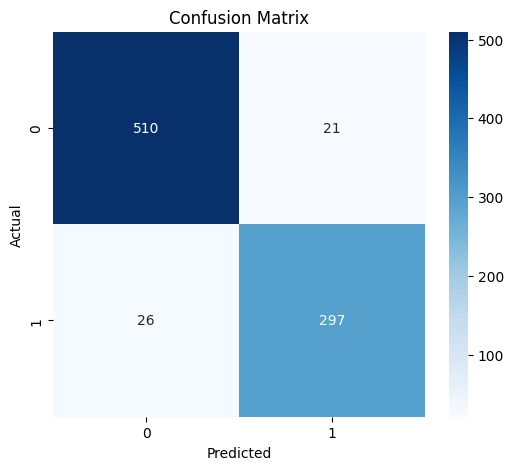

In [10]:

# 5. Plot confusion matrix using heatmap
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [11]:

# 6. Print metrics
print("Classification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       531
           1       0.93      0.92      0.93       323

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



In [12]:

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average=None)
recall = recall_score(Y_test, Y_pred, average=None)
f1 = f1_score(Y_test, Y_pred, average=None)


In [13]:

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (each class): {precision}")
print(f"Recall (each class): {recall}")
print(f"F1-score (each class): {f1}")


Accuracy: 0.9450
Precision (each class): [0.95149254 0.93396226]
Recall (each class): [0.96045198 0.91950464]
F1-score (each class): [0.95595127 0.92667707]
